# COVID-19 cases worldwide

This notebook provides useful information about the coronavirus outbreak across the world.
Although it was written in a programming language (Python), please ignore the code if you're not familiar to it.

The data here displayed is taken from a source published by the Johns Hopkins University. You can see at the  original source here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data.

However, I transformed the data into a more useful source for the purposes of this work. You might find the new format at https://github.com/McSonk/covid19/tree/master/data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from cv19.utils.plots import plot_country_cases, plot_top5, plot_country_deaths
from cv19.utils.manipulation import calc_changes
%matplotlib inline
# Read data from csv
data = pd.read_csv('data/conf_per_day.csv', index_col='Date', parse_dates=True)
deaths = pd.read_csv('data/deaths_per_day.csv', index_col='Date', parse_dates=True)
# Update Mexican data
data['Mexico'] = data['Mexico'].shift(-1)
data.loc['2020-03-31', 'Mexico'] = 1215
data['Mexico'] = data['Mexico'].astype('int64')

deaths['Mexico'] = deaths['Mexico'].shift(-1)
deaths.loc['2020-03-22', 'Mexico'] = 2
deaths.loc['2020-03-23', 'Mexico'] = 4
deaths.loc['2020-03-31', 'Mexico'] = 29
deaths['Mexico'] = deaths['Mexico'].astype('int64')
# Get the totals worldwide
data['the world'] = data.sum(axis=1)
deaths['the world'] = deaths.sum(axis=1)
# Calc the changes intradays
changes = calc_changes(data)
death_changes = calc_changes(deaths)

## Part 1: What are we talking about?

The further analysis presents the coronavirus confirmed cases we have information about across the several days the illness have been in the world.

In [2]:
print("Number of infected countries: %d" % data.columns.size)

Number of infected countries: 181


Top 10 countries by confirmed cases

the world         857,608
US                188,172
Italy             105,792
Spain              95,923
China              82,279
Germany            71,808
France             52,827
Iran               44,605
United Kingdom     25,481
Switzerland        16,605
Turkey             13,531
Name: 2020-03-31 00:00:00, dtype: object

--- Updated the March 21th, 2020
Source: Johns Hopkins University
857608


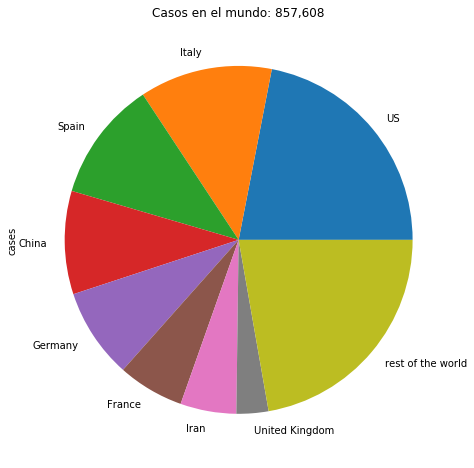

In [4]:
print("Top 10 countries by confirmed cases")
print()
print(data.iloc[-1].sort_values(ascending=False).apply(lambda x: '{:,}'.format(x)).head(11))
print()
print("--- Updated the March 21th, 2020")
print("Source: Johns Hopkins University")

test = data.iloc[-1].sort_values(ascending=False).head(9)
world = test['the world']
test.drop('the world', inplace=True)

test.name = 'cases'
test['rest of the world'] = world - test.sum()

print(test.sum())
plt.figure(figsize=(15, 8))
test.plot.pie()
plt.title('Casos en el mundo: %s' % f'{world:,}')
plt.show()

Top 10 countries by confirmed demises

the world         42,108
Italy             12,428
Spain              8,464
US                 3,873
France             3,532
China              3,309
Iran               2,898
United Kingdom     1,793
Netherlands        1,040
Germany              775
Belgium              705
Name: 2020-03-31 00:00:00, dtype: object

--- Updated the March 21th, 2020
Source: Johns Hopkins University


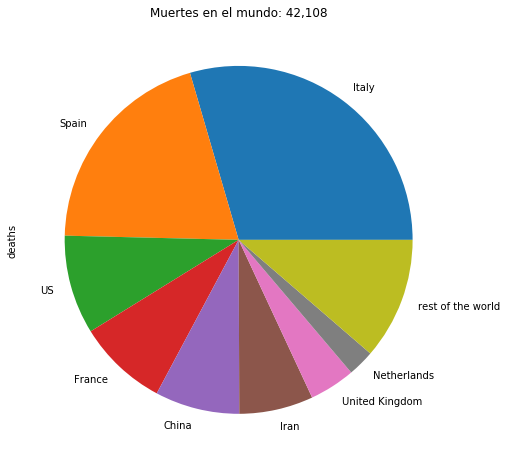

In [5]:
print("Top 10 countries by confirmed demises")
print()
print(deaths.iloc[-1].sort_values(ascending=False).apply(lambda x: '{:,}'.format(x)).head(11))
print()
print("--- Updated the March 21th, 2020")
print("Source: Johns Hopkins University")

deaths[['Spain', 'Italy']].iloc[-1].sum()

test = deaths.iloc[-1].sort_values(ascending=False).head(9)
world = test['the world']
test.drop('the world', inplace=True)

test.name = 'deaths'
test['rest of the world'] = world - test.sum()

plt.figure(figsize=(15, 8))
test.plot.pie()
plt.title('Muertes en el mundo: %s' % f'{world:,}')
plt.show()

### Visual representation

The followin plot shows the evolution of the confirmed cases in the first 5 nations with most cases detected

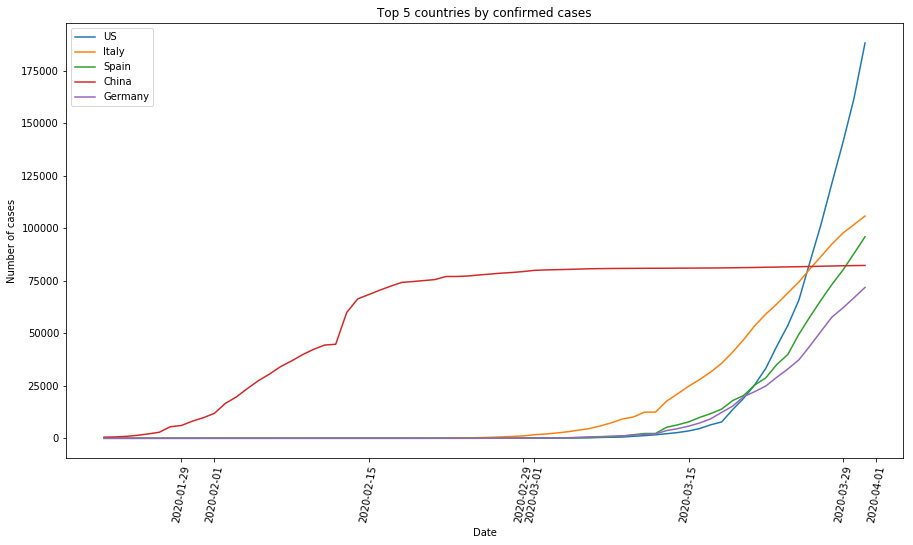

In [6]:
plot_top5(data)

This graph shows the 5 countries with more deaths

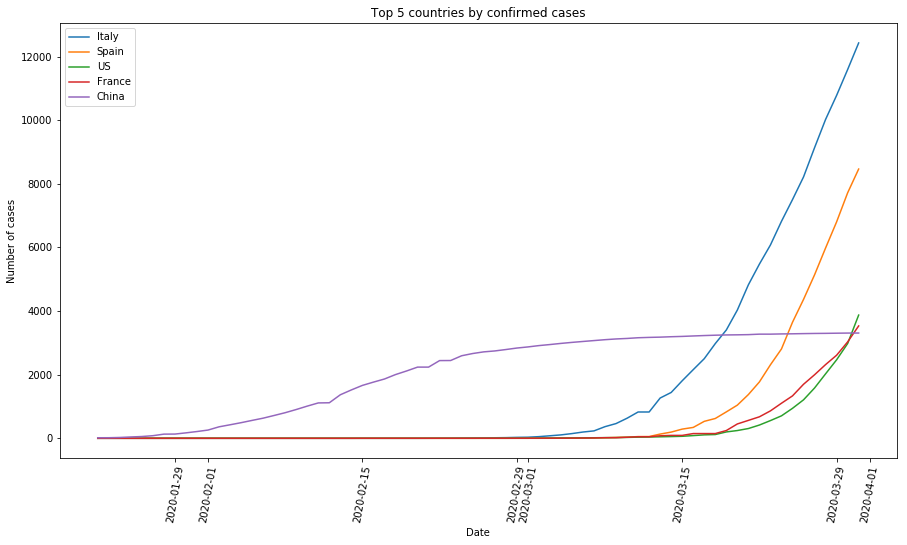

In [7]:
plot_top5(deaths)

## Part 2: Global overview

In the next section we'll display information about the crisis in all over the world

First case for the world detected on 2020-01-22 00:00:00. 69 days have passed since then
Max number of new cases: 75,142.0
Currently having 857,608 confirmed cases


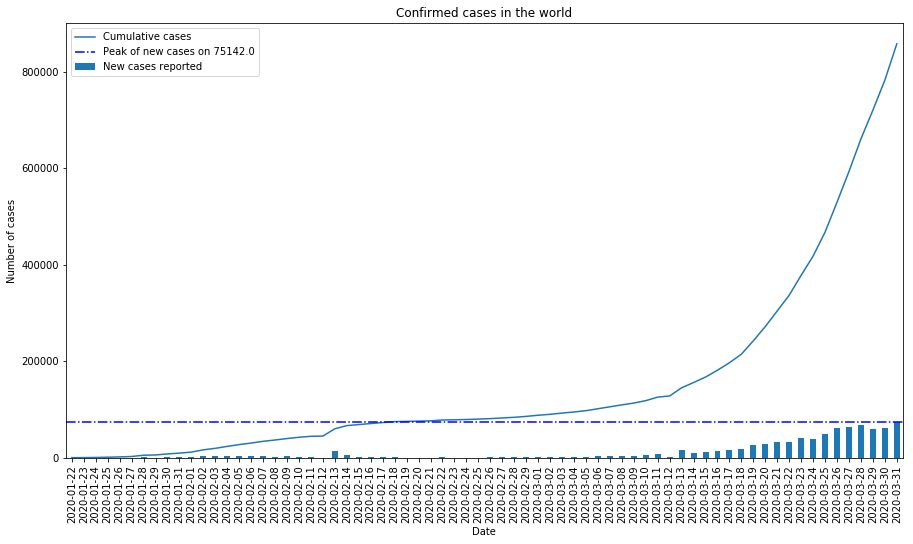

In [8]:
plot_country_cases(data, 'the world', changes=changes)

First case for the world detected on 2020-01-22 00:00:00. 69 days have passed since then
Highest number of daily deaths: 4,518.0
Currently having 42,108 confirmed cases


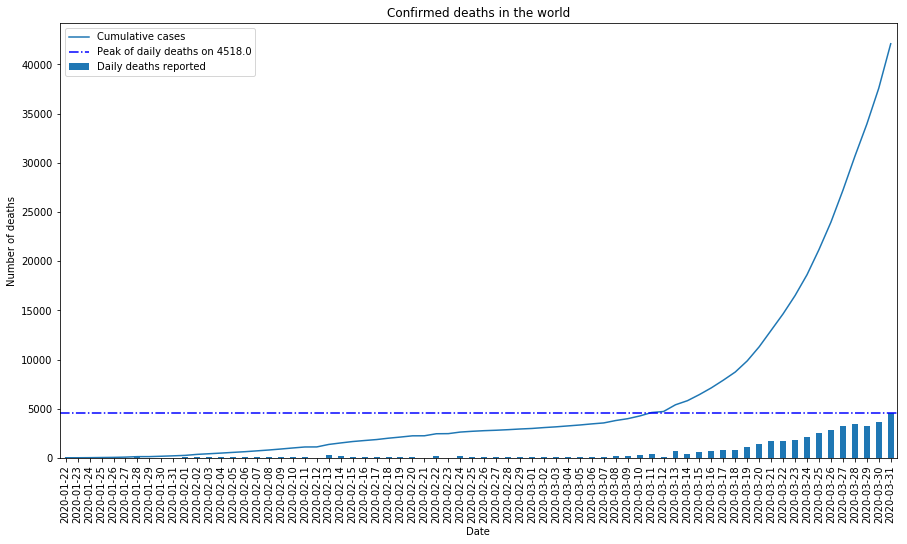

In [9]:
plot_country_deaths(deaths, 'the world', changes=death_changes)

## Part 3: Countries overview

The following sections depicts graphs of data available of confirmed cases per country.

### Mexico

Primer caso en Mexico detectado el 2020-02-27 00:00:00. Han pasado 33 días desde entonces
Máximo número de nuevos casos: 145.0
Cuarentena iniciada en 2020-03-23
Actualmente hay 1,215 casos confirmados


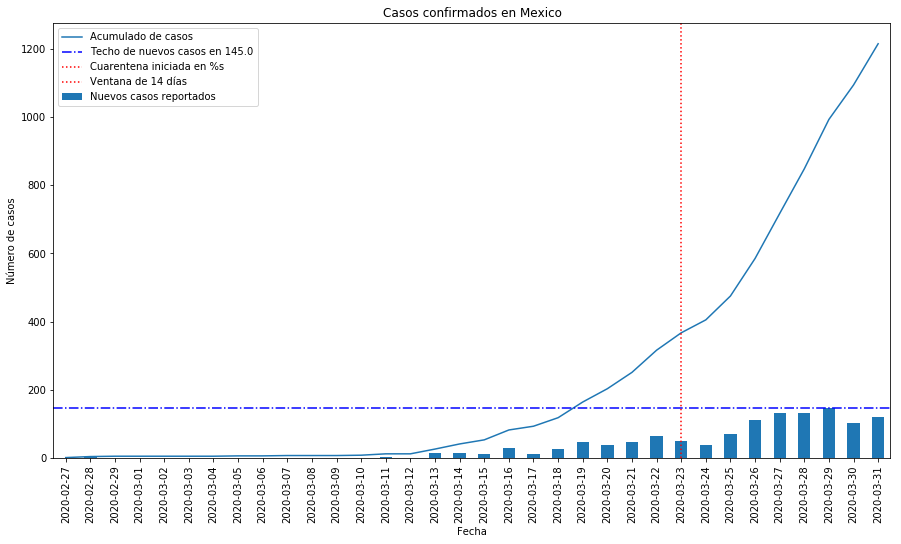

Date
2020-03-27    132.0
2020-03-28    131.0
2020-03-29    145.0
2020-03-30    101.0
2020-03-31    121.0
Name: Mexico, dtype: float64
Date
2020-03-27    22.564103
2020-03-28    18.270572
2020-03-29    17.099057
2020-03-30    10.171198
2020-03-31    11.060329
Name: Mexico, dtype: float64


In [10]:
plot_country_cases(data, 'Mexico', changes=changes, language='es', ld_date='2020-03-23')
print(changes['Mexico'].tail())
print(data['Mexico'].pct_change().tail() * 100)

Primer caso en Mexico detectado el 2020-03-18 00:00:00. Han pasado 13 días desde entonces
Máximo número de muertes reportadas: 8.0
Actualmente hay 29 casos confirmados


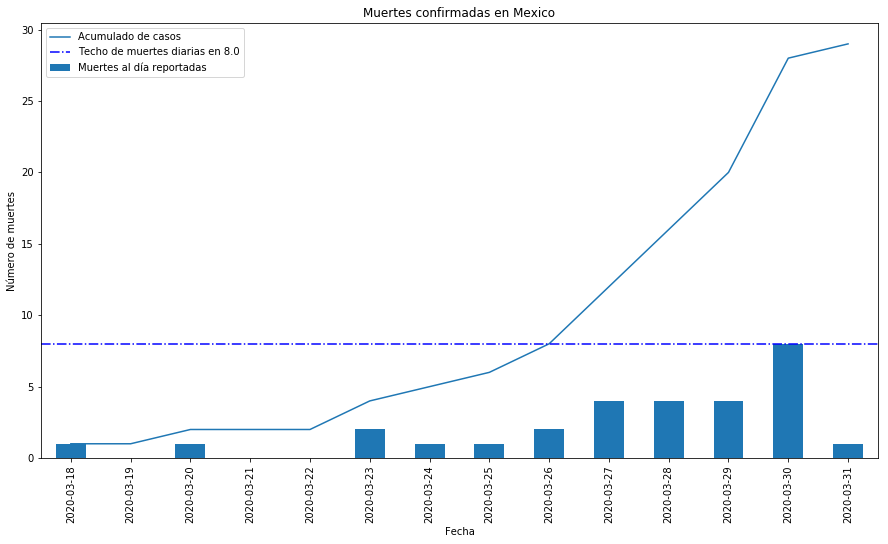

Date
2020-03-27    50.000000
2020-03-28    33.333333
2020-03-29    25.000000
2020-03-30    40.000000
2020-03-31     3.571429
Name: Mexico, dtype: float64


In [11]:
plot_country_deaths(deaths, 'Mexico', changes=death_changes, language='es')
print(deaths['Mexico'].pct_change().tail() * 100)

### Italy

Primer caso en Italy detectado el 2020-01-31 00:00:00. Han pasado 58 días desde entonces
Máximo número de nuevos casos: 6,557.0
Cuarentena iniciada en 2020-03-10
Actualmente hay 97,689 casos confirmados


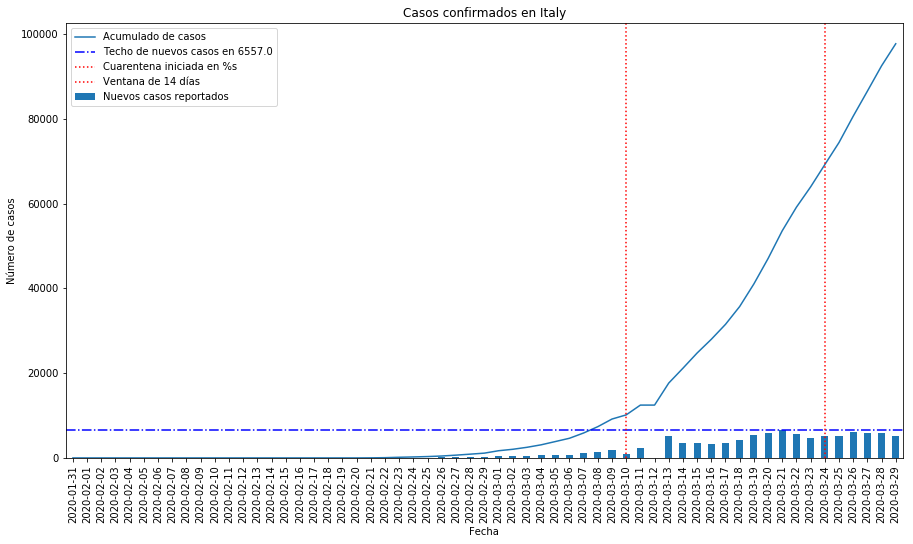

In [11]:
plot_country_cases(data, 'Italy',  changes=changes, language='es', ld_date='2020-03-10')

Primer caso en Italy detectado el 2020-02-21 00:00:00. Han pasado 37 días desde entonces
Máximo número de muertes reportadas: 919.0
Cuarentena iniciada en 2020-03-10
Actualmente hay 10,779 casos confirmados


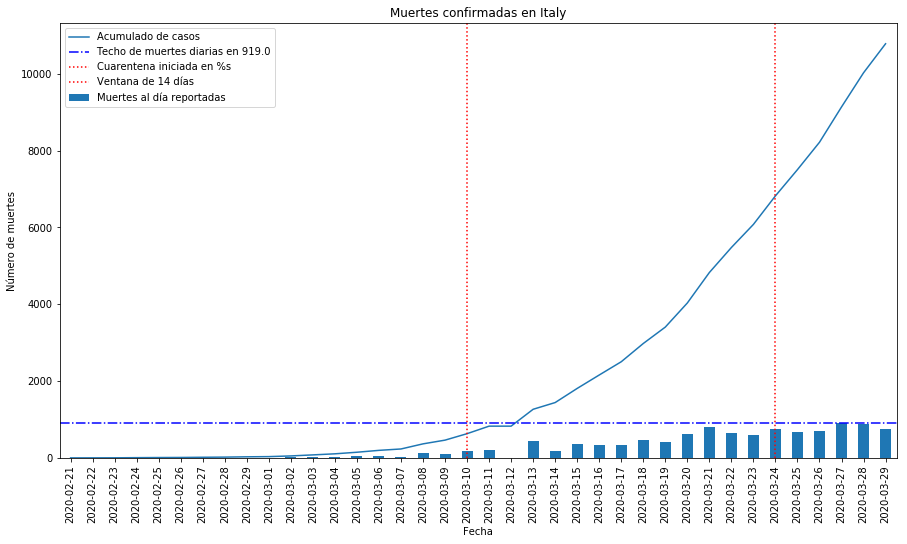

In [12]:
plot_country_deaths(deaths, 'Italy', language='es', changes=death_changes, ld_date='2020-03-10')

### China

Primer caso en China detectado el 2020-01-22 00:00:00. Han pasado 69 días desde entonces
Máximo número de nuevos casos: 15,136.0
Cuarentena iniciada en 2020-01-25
Actualmente hay 82,279 casos confirmados


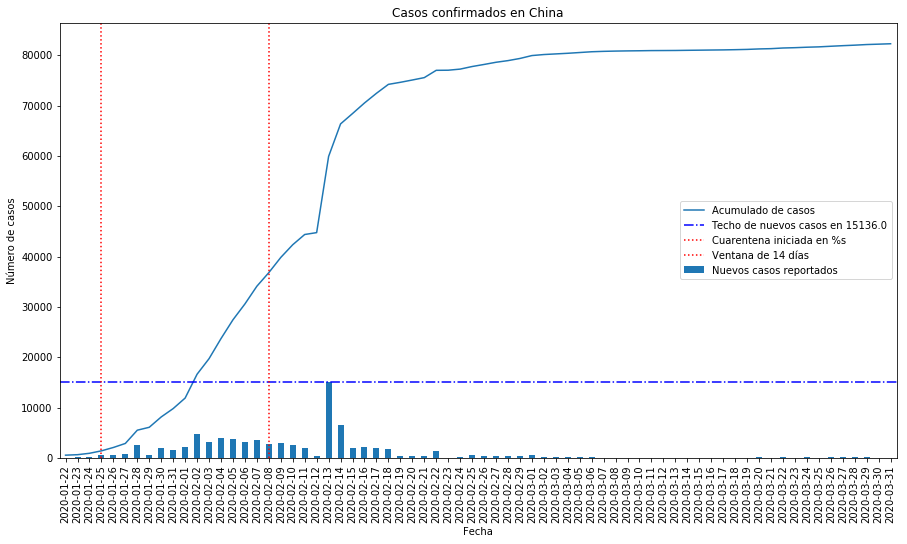

In [12]:
plot_country_cases(data, 'China', '2020-01-25', language='es', changes=changes)

First case for China detected on 2020-01-22 00:00:00. 69 days have passed since then
Highest number of daily deaths: 252.0
Currently having 3,309 confirmed cases


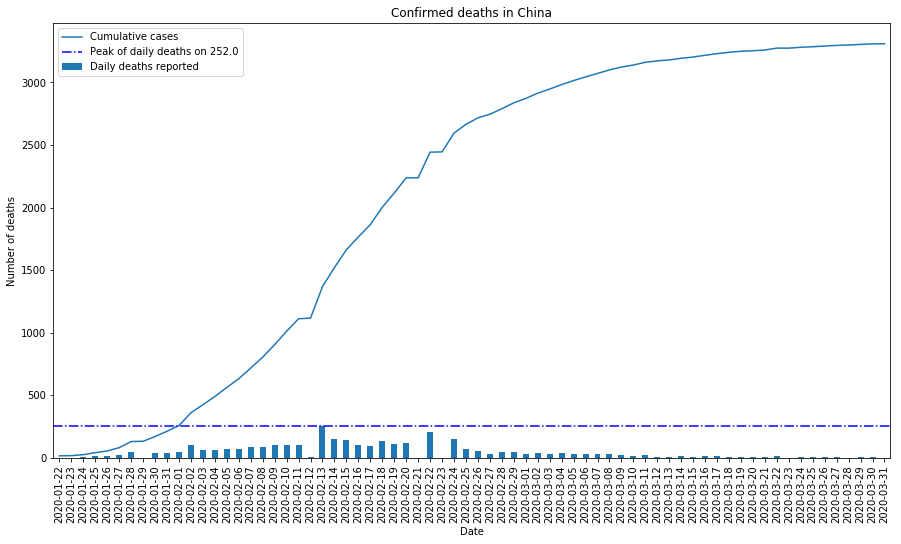

In [13]:
plot_country_deaths(deaths, 'China', changes=death_changes)

### South Korea

South Korea is a really special case. Although is one of the 5 nations with most confirmed cases, it also has a really low mortality rate. The high quantity of confirmed cases is atributed to the openess of the government, and the fact they're capable of doing 10,000 tests per day.

Primer caso en Korea, South detectado el 2020-01-22 00:00:00. Han pasado 68 días desde entonces
Máximo número de nuevos casos: 851.0
Actualmente hay 9,661 casos confirmados


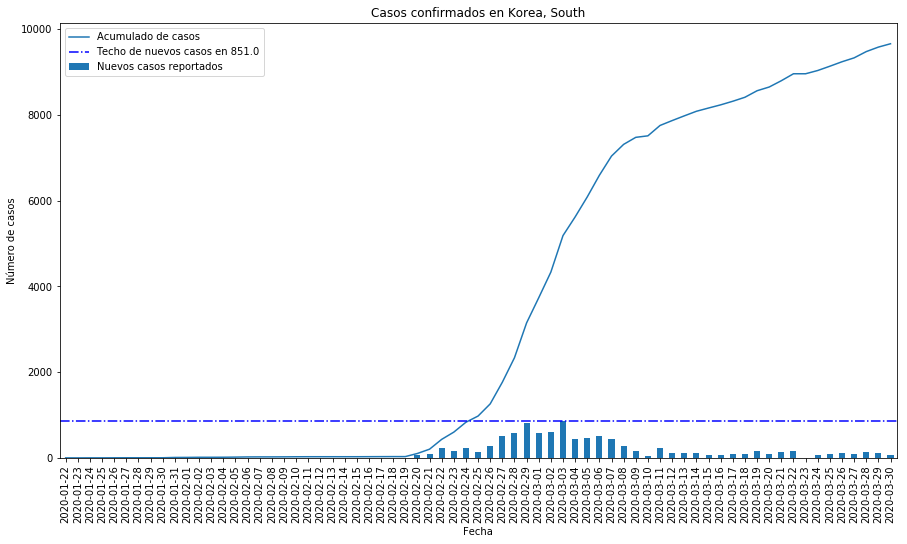

In [59]:
plot_country_cases(data, 'Korea, South', changes=changes, language='es')

Primer caso en Korea, South detectado el 2020-02-20 00:00:00. Han pasado 40 días desde entonces
Máximo número de muertes reportadas: 11.0
Actualmente hay 162 casos confirmados


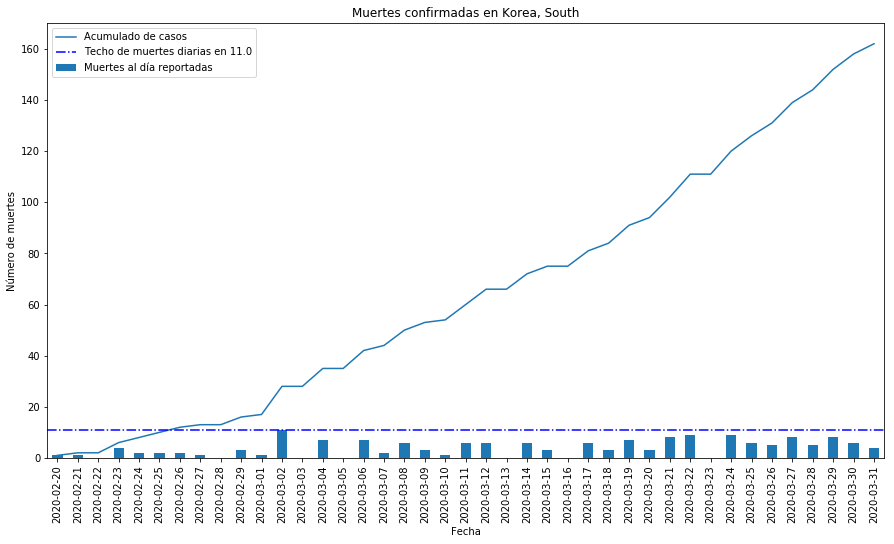

In [14]:
plot_country_deaths(deaths, 'Korea, South', changes=death_changes, language='es')

### Chile

First case for Chile detected on 2020-03-03 00:00:00. 26 days have passed since then
Max number of new cases: 304.0
Currently having 2,139 confirmed cases


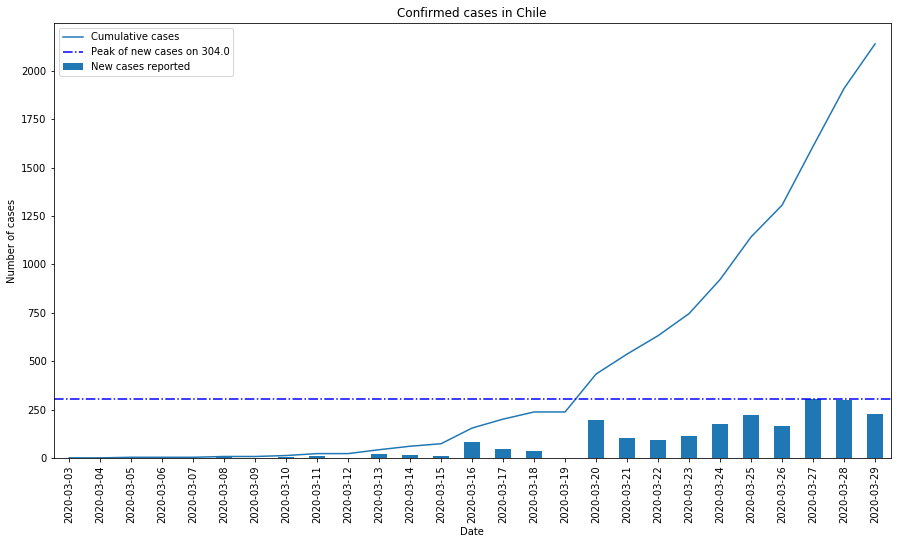

In [18]:
plot_country_cases(data, 'Chile', changes=changes)

First case for Chile detected on 2020-03-22 00:00:00. 7 days have passed since then
Highest number of daily deaths: 1.0
Currently having 7 confirmed cases


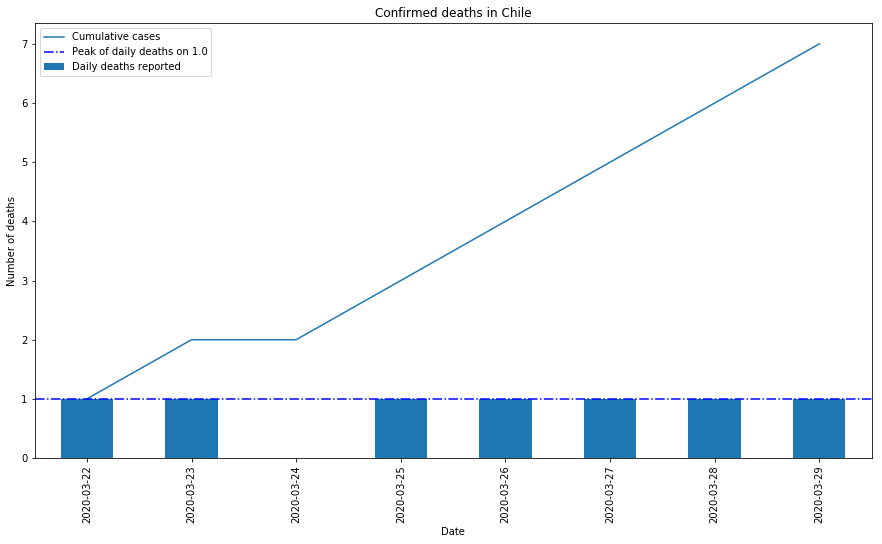

In [19]:
plot_country_deaths(deaths, 'Chile', changes=death_changes)

### Spain

First case for Spain detected on 2020-02-01 00:00:00. 59 days have passed since then
Max number of new cases: 9,630.0
Currently having 95,923 confirmed cases


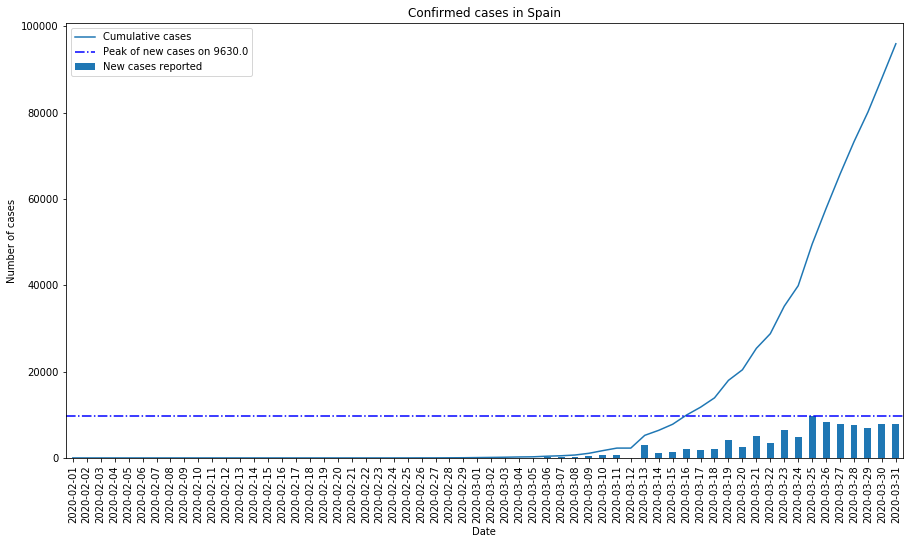

In [15]:
plot_country_cases(data, 'Spain', changes=changes)

Primer caso en Spain detectado el 2020-03-03 00:00:00. Han pasado 28 días desde entonces
Máximo número de muertes reportadas: 913.0
Actualmente hay 8,464 casos confirmados


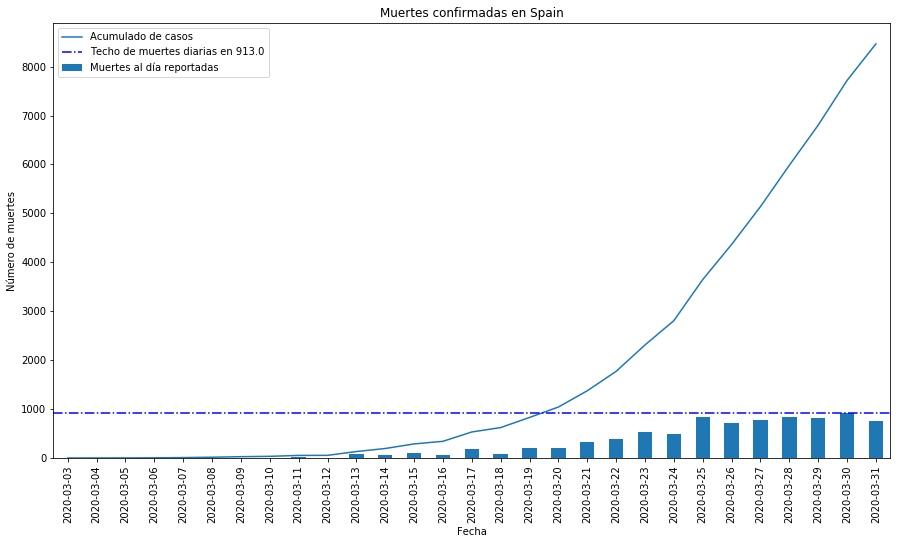

In [16]:
plot_country_deaths(deaths, 'Spain', changes=death_changes, language='es')

### United States

Primer caso en US detectado el 2020-01-22 00:00:00. Han pasado 69 días desde entonces
Máximo número de nuevos casos: 26,365.0
Actualmente hay 188,172 casos confirmados


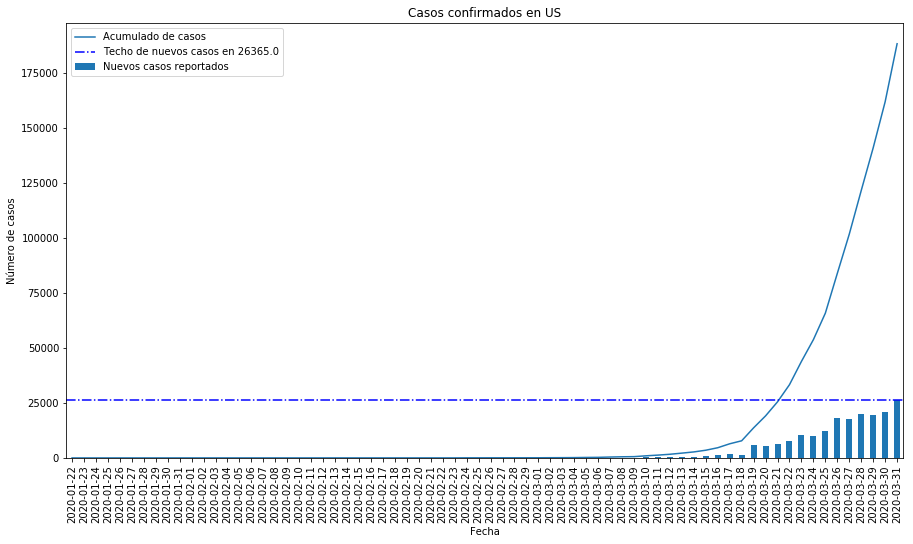

Primer caso en US detectado el 2020-02-29 00:00:00. Han pasado 31 días desde entonces
Máximo número de muertes reportadas: 895.0
Actualmente hay 3,873 casos confirmados


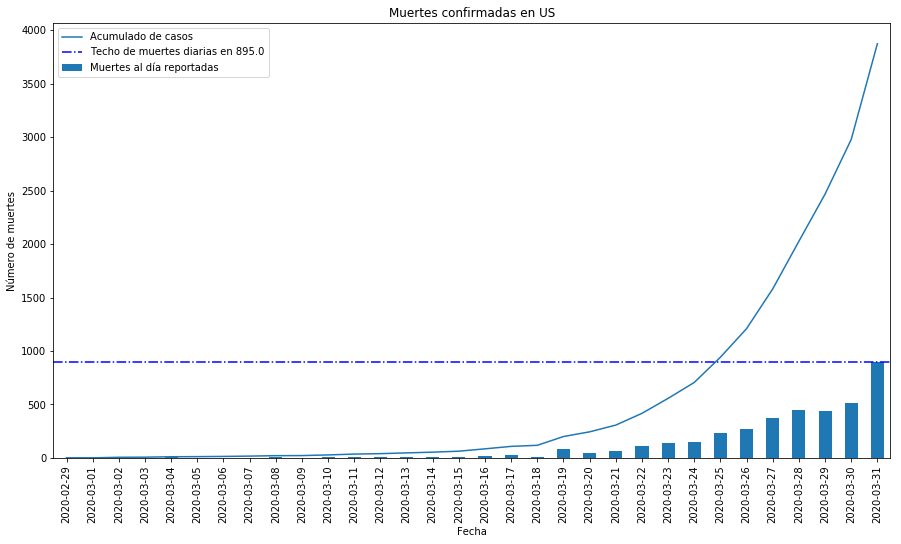

In [17]:
plot_country_cases(data, 'US', changes=changes, language='es')
plot_country_deaths(deaths, 'US', changes=death_changes, language='es')